# This notebook uses images create via the web app

Please see: data-science/myohddac/README.txt

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

In [3]:
path = Path.cwd();path

PosixPath('/home/peter/github/data-science/myohddac/notebooks')

Load the MNIST classifier: learner and databunch

In [4]:
learn = load_learner(path, 'mnist-learn-export.pkl')
data = DataBunch.load_empty(path, 'mnist-data-export.pkl')
image_list = ImageList.from_folder(path.parents[0]/'images')
data.add_test(image_list)

Load the "MNIST or not" model - we'll use the same data for both models

In [5]:
mnist_or_not_learn = load_learner(path, 'mnist-or-not-learn-export.pkl')
opt_thresh = mnist_or_not_learn.model.opt_thresh
# mnist_or_not_data = DataBunch.load_empty(path, 'mnist-or-not-data-export.pkl')
# mnist_or_not_data.add_test(image_list)

Run an image through both models
- the MNIST classifier seems to be doing a good job
- the "MNIST or not" model is not doing so well - maybe the threshold is too high for these images?

/home/peter/github/data-science/myohddac/images/4-y-1576168454.594822.png
target 4 predicted 4 with "probability" 0.993
is_digit_score 0.737 is above the threshold of 0.504


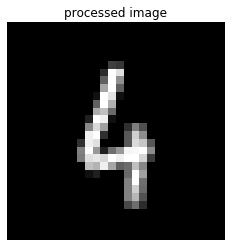

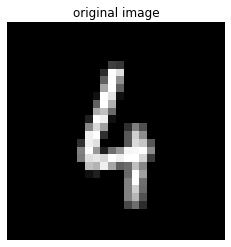

In [6]:
data_item_idx = 3
print(image_list.items[data_item_idx])
img_size = 4
img = data.test_ds[data_item_idx][0]
img.show(figsize=(img_size, img_size), title='processed image')
image_list[data_item_idx].show(
    figsize=(img_size, img_size), title='original image')
target = image_list.items[data_item_idx].stem[0]
pred = learn.predict(img)
prob = round(torch.max(pred[2]).item(), 3)
is_digit_score = round(mnist_or_not_learn.predict(img)[1].item(), 3)
is_digit = is_digit_score>opt_thresh
print('target', target, 'predicted', pred[0], 'with "probability"', prob)
print('is_digit_score', is_digit_score, 'is', 'above' if is_digit else 'below', 'the threshold of', opt_thresh)

# How can we use these models to confidently classify hand drawn digits, that might not be digits?

We have;
- a classifier that will always tell us the image is a digit and
- a regressor that will tell us how much digit is in the image

Maybe it's a simple as saying; if both scores are high, we can be confident in the classification?

<table>
    <tr>
        <td rowspan=4 style='transform: rotate(-90deg)' valign="bottom">Regressor</td>
        <td colspan=3>Classifier</td>
    </tr>
    <tr>
        <td></td><td>high</td><td>low</td>
    </tr>
    <tr>
        <td>high</td><td bgcolor='green'>Y</td><td bgcolor='orange'>?</td>
    </tr>
    <tr>
        <td>low</td><td bgcolor='orange'>?</td><td bgcolor='red'>N</td>
    </tr>
</table>

TODO: try to find thresh values, which could be different for different digits